# Shapes and line types
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to use different shapes and line types in your graph.

## Solution
<img src="http://www.cookbook-r.com/Graphs/Shapes_and_line_types/figure/unnamed-chunk-2-1.png">
<img src="http://www.cookbook-r.com/Graphs/Shapes_and_line_types/figure/line_types-1.png">


Note that with bitmap output, the filled symbols 15-18 may render without proper anti-aliasing; they can appear jagged, pixelated, and not properly centered, though this varies among platforms. Symbols 19 and 21-25 have an outline around the filled area, and will render with smoothed edges on most platforms. For symbols 21-25 to appear solid, you will also need to specify a fill (bg) color that is the same as the outline color (col); otherwise they will be hollow.

### Standard graphics

Use the pch option to set the shape, and use lty and lwd to set the line type and width. The line type can be specified by name or by number.

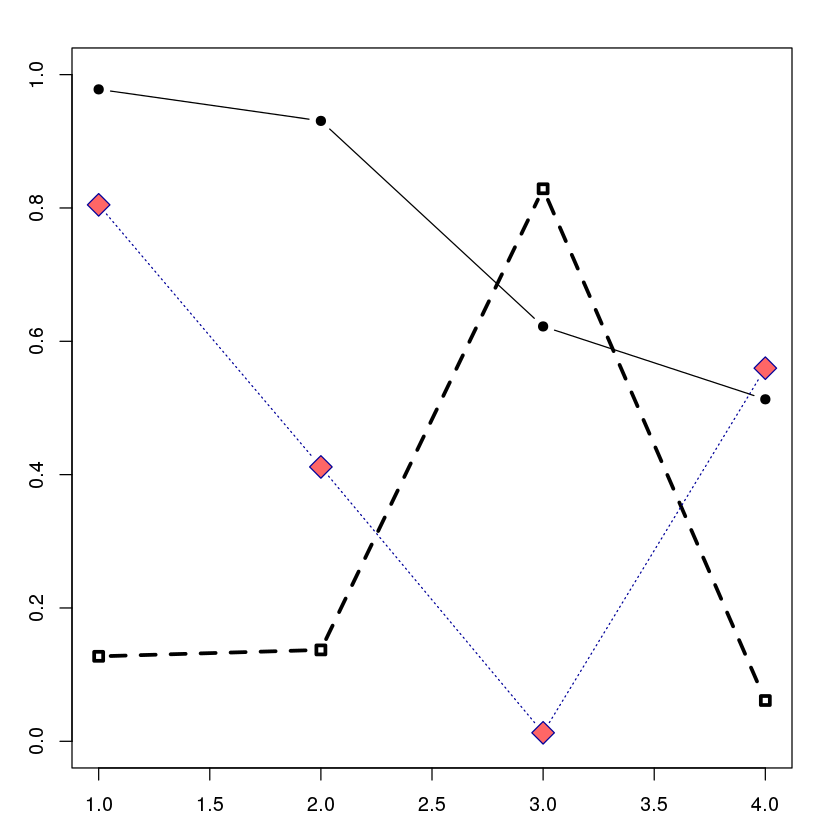

In [1]:
set.seed(331)

# Plot some points with lines
# Set up the plotting area
par(mar=c(3,3,2,2))
plot(NA, xlim=c(1,4), ylim=c(0,1))

# Plot solid circles with solid lines
points(1:4, runif(4), type="b", pch=19)
# Add open squares with dashed line, with heavier line width
points(1:4, runif(4), type="b", pch=0,  lty=2, lwd=3)

points(1:4, runif(4), type="b", pch=23,   # Diamond shape
       lty="dotted", cex=2,               # Dotted line, double-size shapes
       col="#000099", bg="#FF6666")       # blue line, red fill

### ggplot2

With ggplot2, shapes and line types can be assigned overall (e.g., if you want all points to be squares, or all lines to be dashed), or they can be conditioned on a variable.

In [2]:
# Sample data
df <- read.table(header=T, text='
  cond xval yval
     A    1  2.0
     A    2  2.5
     B    1  3.0
     B    2  2.0
')


library(ggplot2)

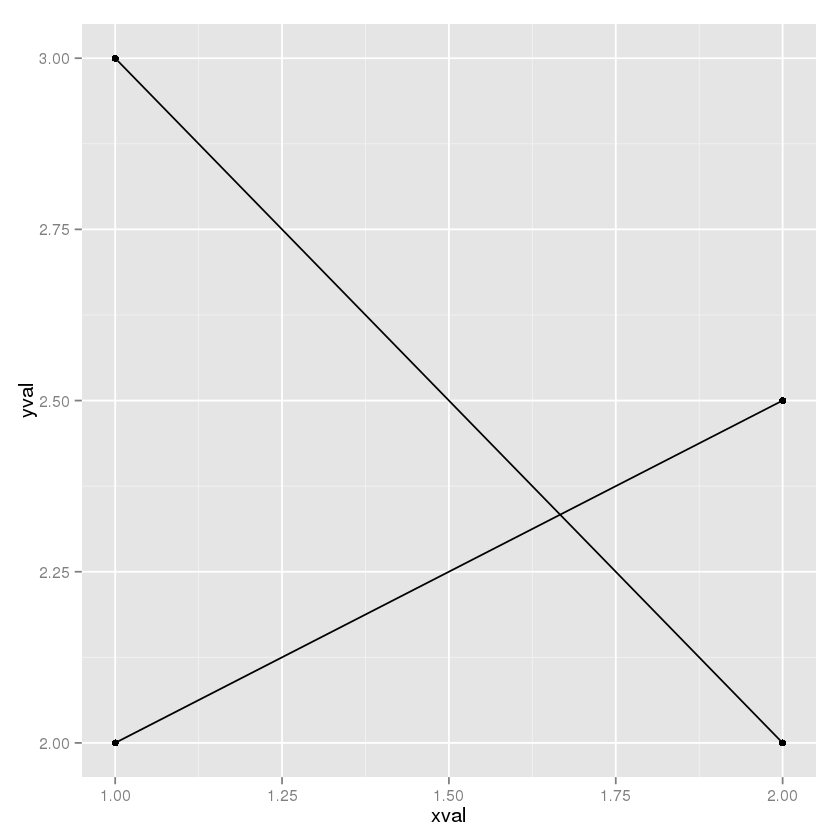

In [3]:
# Plot with standard lines and points
# group = cond tells it which points to connect with lines
ggplot(df, aes(x=xval, y=yval, group = cond)) +
    geom_line() +
    geom_point()

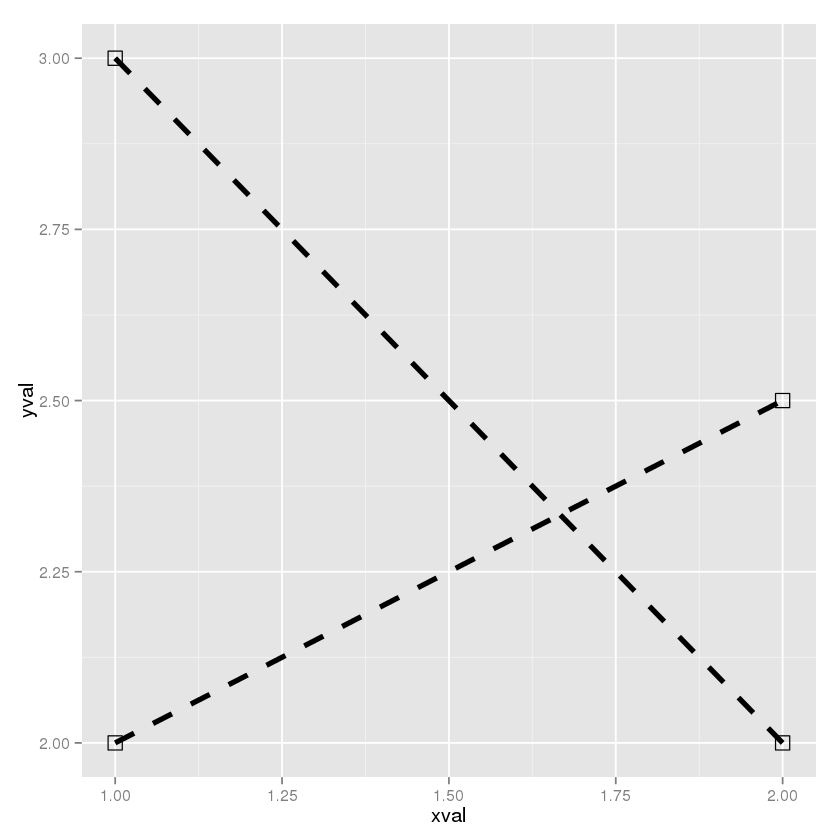

In [4]:
# Set overall shapes and line type
ggplot(df, aes(x=xval, y=yval, group = cond)) +
    geom_line(linetype="dashed",  # Dashed line
              size = 1.5) +       # Thicker line
    geom_point(shape = 0,         # Hollow squares
               size = 4)          # Large points

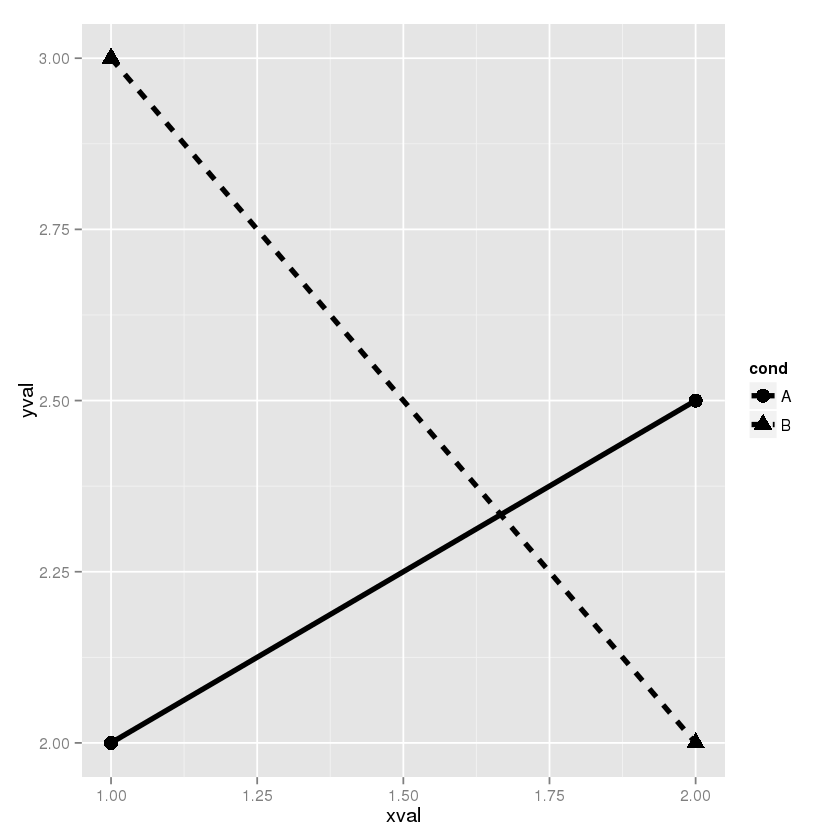

In [5]:
# Condition shapes and line type on variable cond
ggplot(df, aes(x=xval, y=yval, group = cond)) +
    geom_line(aes(linetype=cond), # Line type depends on cond
              size = 1.5) +       # Thicker line
    geom_point(aes(shape=cond),   # Shape depends on cond
               size = 4)          # Large points

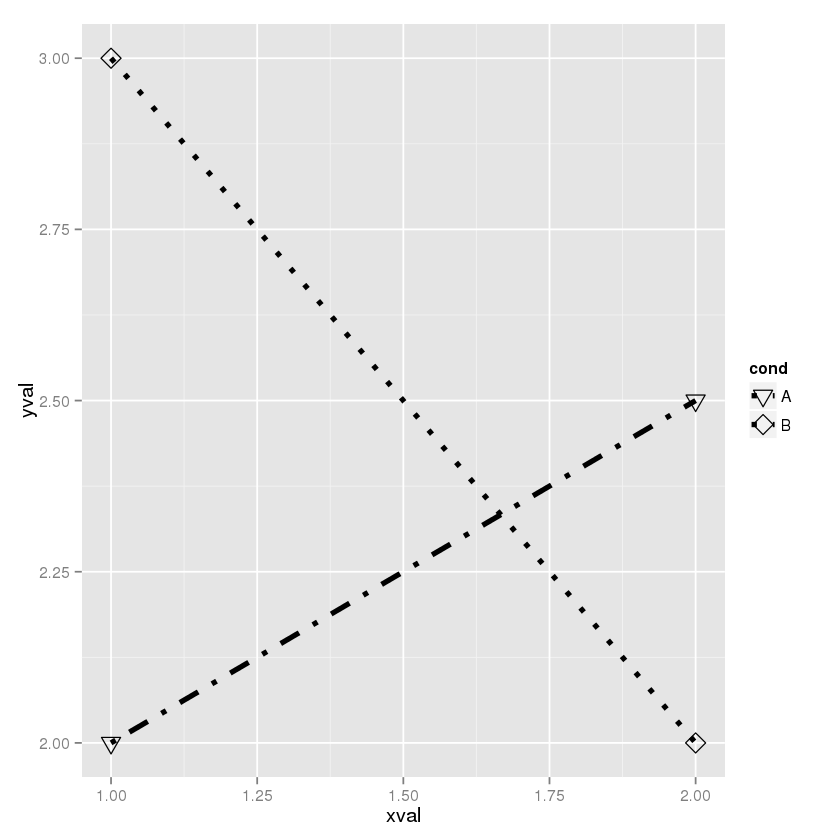

In [6]:
# Same as previous, but also change the specific linetypes and
# shapes that are used
ggplot(df, aes(x=xval, y=yval, group = cond)) +
    geom_line(aes(linetype=cond), # Line type depends on cond
              size = 1.5) +       # Thicker line
    geom_point(aes(shape=cond),   # Shape depends on cond
               size = 4) +        # Large points
    scale_shape_manual(values=c(6,5)) +                  # Change shapes
    scale_linetype_manual(values=c("dotdash", "dotted")) # Change linetypes

By default, ggplot2 uses solid shapes. If you want to use hollow shapes, without manually declaring each shape, you can use scale_shape(`solid=FALSE`). Note, however, that the lines will visible inside the shape. To avoid this, you can use shapes 21-25 and specify a white fill.

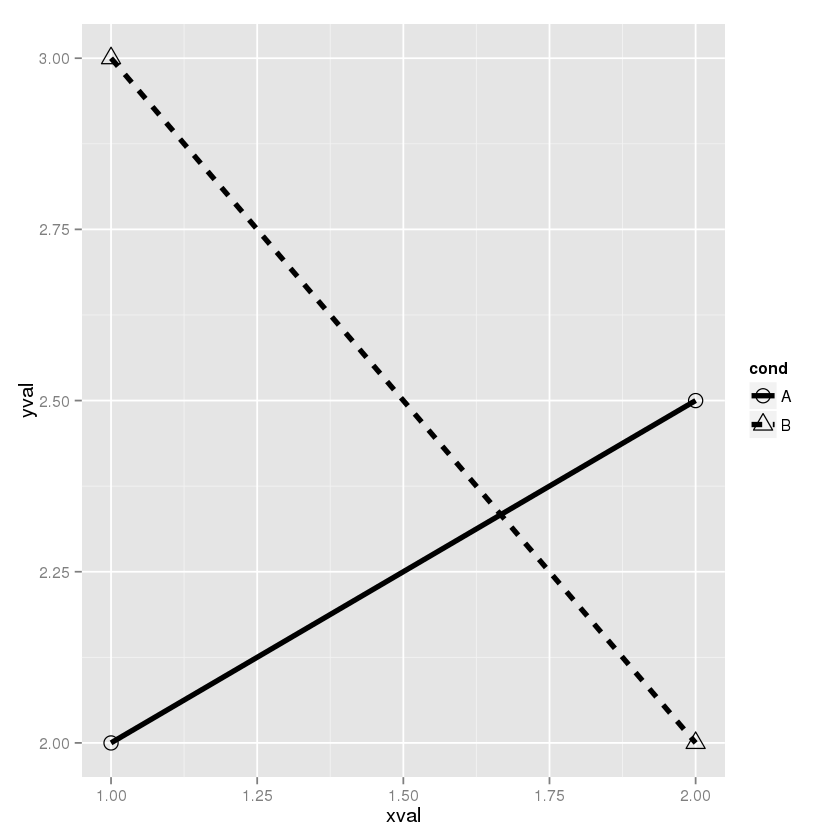

In [7]:
# Hollow shapes
ggplot(df, aes(x=xval, y=yval, group = cond)) +
    geom_line(aes(linetype=cond), # Line type depends on cond
              size = 1.5) +       # Thicker line
    geom_point(aes(shape=cond),   # Shape depends on cond
               size = 4)  +       # Large points
    scale_shape(solid=FALSE)

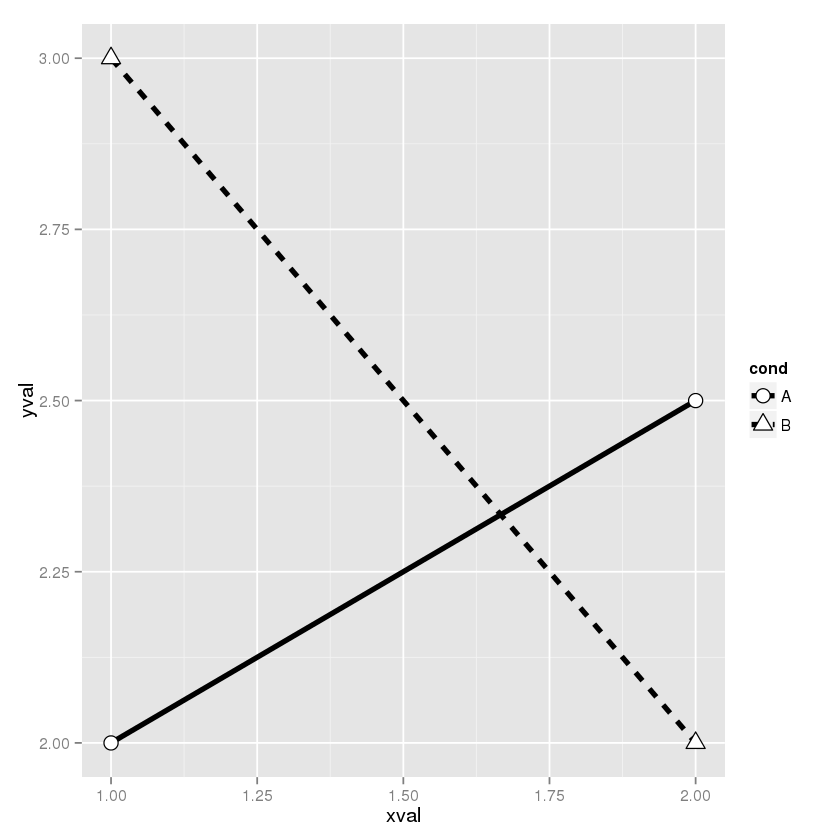

In [8]:
# Shapes with white fill
ggplot(df, aes(x=xval, y=yval, group = cond)) +
    geom_line(aes(linetype=cond), # Line type depends on cond
              size = 1.5) +       # Thicker line
    geom_point(aes(shape=cond),   # Shape depends on cond
               fill = "white",    # White fill
               size = 4)  +       # Large points
    scale_shape_manual(values=c(21,24))  # Shapes: Filled circle, triangle

In [9]:
### Note

This code will generate the chart of line types seen at the top.

ERROR: Error in parse(text = x, srcfile = src): <text>:3:6: unexpected symbol
2: 
3: This code
        ^


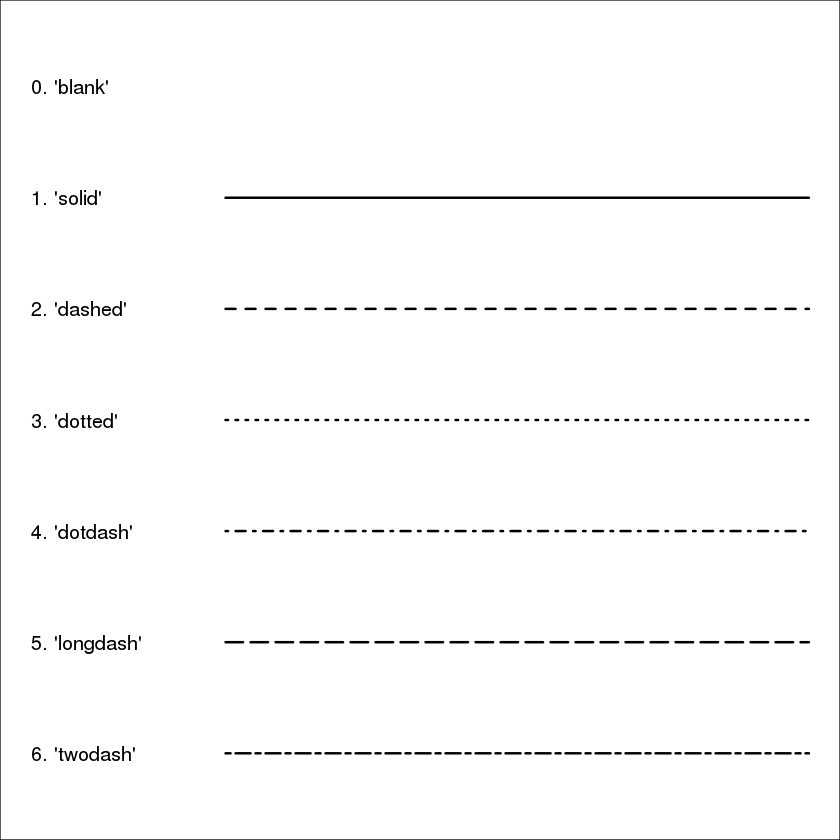

In [10]:
par(mar=c(0,0,0,0))

# Set up the plotting area
plot(NA, xlim=c(0,1), ylim=c(6.5, -0.5),
    xaxt="n", yaxt="n",
    xlab=NA, ylab=NA )

# Draw the lines
for (i in 0:6) {
    points(c(0.25,1), c(i,i), lty=i, lwd=2, type="l")
}
# Add labels
text(0, 0, "0. 'blank'"   ,  adj=c(0,.5))
text(0, 1, "1. 'solid'"   ,  adj=c(0,.5))
text(0, 2, "2. 'dashed'"  ,  adj=c(0,.5))
text(0, 3, "3. 'dotted'"  ,  adj=c(0,.5))
text(0, 4, "4. 'dotdash'" ,  adj=c(0,.5))
text(0, 5, "5. 'longdash'",  adj=c(0,.5))
text(0, 6, "6. 'twodash'" ,  adj=c(0,.5))